<a href="https://colab.research.google.com/github/ShaneenAira/FineAppleAI/blob/main/FineApple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras opencv-python scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_hub

In [ ]:
!pip install -U keras keras-cv keras-hub tensorflow opencv-python numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.1/792.1 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 828.2 kB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
  Attempting uninstall: keras-hub
    Fou

In [ ]:
!pip install tensorflow segmentation-models

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached segmentation_models-1.0.1-py3-none-any.whl.metadata (938 bytes)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


# here is where to:

*   unzip a file
*   save folder in zip
*   delete folder

unzip the zip file

In [3]:
import zipfile
import os

zip_path = '/content/PINEAPPLE DATA SETS.zip'  # Corrected the file path by removing the extra /
extract_folder = '/content/Dataset/'  # Destination folder

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted successfully!")

Dataset extracted successfully!


Display the extracted folder from the zip file


In [ ]:
import os

# List extracted files
dataset_folder = "/content/Dataset/PINEAPPLE DATA SETS/"
print("Extracted files:", os.listdir(dataset_folder))


Extracted files: ['FORMOSA', 'DOLE']


save zip files

In [ ]:
import shutil

shutil.make_archive("/content/normalized_images", 'zip', "/content/normalized_images/")
print("Folder compressed successfully!")

Folder compressed successfully!


delete folder

In [ ]:
import shutil

folder_path = "/content/pineapple_extracted_refined"  # Change this to the folder you want to delete

shutil.rmtree(folder_path)  # Delete the folder and all its files

print(f"Deleted folder: {folder_path}")

Deleted folder: /content/pineapple_extracted_refined


In [ ]:
import shutil

folder_path = '/content/Dataset'  # Replace with the actual path

shutil.rmtree(folder_path, ignore_errors=True)

# Normalization of dataset

# Resizing the Dataset

In [4]:
import cv2
import os

# Function to resize an image
def resize_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)  # Load image
    if image is None:
        print(f"Skipping {image_path}, unable to read file.")
        return None

    resized_image = cv2.resize(image, target_size)  # Resize
    return resized_image

# Function to process all images while keeping folder structure
def resize_images_in_folders(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create output directory if it doesn't exist

    # Loop through varieties (DOLE, FORMOSA)
    for variety in os.listdir(input_folder):
        variety_path = os.path.join(input_folder, variety)

        if os.path.isdir(variety_path):  # Check if it's a folder
            output_variety = os.path.join(output_folder, variety)
            os.makedirs(output_variety)  # Create corresponding variety folder in resized_images

            # Loop through ripeness categories (UNRIPE, RIPE, OVERRIPE)
            for ripeness_stage in os.listdir(variety_path):
                ripeness_path = os.path.join(variety_path, ripeness_stage)

                if os.path.isdir(ripeness_path):  # Check if it's a folder
                    output_ripeness = os.path.join(output_variety, ripeness_stage)
                    os.makedirs(output_ripeness)  # Create corresponding ripeness folder

                    # Loop through images in the ripeness category
                    for img_name in os.listdir(ripeness_path):
                        img_path = os.path.join(ripeness_path, img_name)
                        resized_image = resize_image(img_path)

                        if resized_image is not None:
                            output_img_path = os.path.join(output_ripeness, img_name)
                            cv2.imwrite(output_img_path, resized_image)  # Save resized image
                            print(f"Resized and saved: {output_img_path}")

# Define paths
input_folder = "/content/Dataset/PINEAPPLE DATA SETS"  # Path where raw images are stored
output_folder = "/content/resized_images/"  # Destination folder for resized images

# Run the resizing function
resize_images_in_folders(input_folder, output_folder)


Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_26.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_13.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_10.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_27.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_21.jpg
Resized and saved: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_31.jpg
Resized and saved: /content/resized_images/

#identify pineapple in image

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the pre-trained MobileNetV2 model (ImageNet weights)
model = MobileNetV2(weights='imagenet')

def classify_image(image_path):
    """
    Classifies an image using MobileNetV2.
    Assumes the image is already resized to 224x224.

    Returns:
      - A list of the top 3 decoded predictions (tuples of (ImageNetID, label, probability)).
      - The image in RGB format (for visualization, if needed).
    """
    # Load the image (OpenCV loads in BGR format)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None, None

    # Convert the color space from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Prepare image for MobileNetV2 (expand dims and preprocess)
    x = np.expand_dims(img_rgb, axis=0)
    x = preprocess_input(x)

    # Run inference
    preds = model.predict(x)

    # Decode the top 3 predictions into a human-readable format
    decoded = decode_predictions(preds, top=3)[0]

    return decoded, img_rgb


# bg segmentaion using threshholding and morphological operation

In [ ]:
import cv2
import numpy as np
import os

def remove_background_threshold(image_path):
    """
    Removes the background from a pineapple image using color thresholding in the HSV color space
    and morphological operations. It extracts yellow pigments, which are typical in ripe pineapples.

    Parameters:
      image_path (str): Path to the image.

    Returns:
      segmented (ndarray): The image where the background is suppressed.
    """
    # Read the image (assumed to be already pre-resized if needed)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Convert the image from BGR to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for yellow color (adjust these values as needed)
    lower_yellow = np.array([0, 0, 0])
    upper_yellow = np.array([90, 230, 255])


    # Create a binary mask where yellow colors within the range are white and the rest are black
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Refine the mask using morphological operations
    # Create an elliptical kernel for smooth morphological transformations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    # Use opening to remove small noise
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    # Use dilation to fill in any small gaps in the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel, iterations=1)

    # Use the mask to extract the pineapple region from the original image
    segmented = cv2.bitwise_and(image, image, mask=mask)

    return segmented

# Folder processing function: keeps your folder structure and processes each image.
def process_folder(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop over categories (for example, different pineapple varieties)
    for variety in os.listdir(input_folder):
        variety_path = os.path.join(input_folder, variety)
        if os.path.isdir(variety_path):
            output_variety = os.path.join(output_folder, variety)
            os.makedirs(output_variety, exist_ok=True)

            # Loop over subcategories (for example, ripeness stages)
            for ripeness_stage in os.listdir(variety_path):
                ripeness_path = os.path.join(variety_path, ripeness_stage)
                if os.path.isdir(ripeness_path):
                    output_ripeness = os.path.join(output_variety, ripeness_stage)
                    os.makedirs(output_ripeness, exist_ok=True)

                    for img_name in os.listdir(ripeness_path):
                        img_path = os.path.join(ripeness_path, img_name)
                        print(f"Processing: {img_path}")
                        segmented_image = remove_background_threshold(img_path)
                        if segmented_image is not None:
                            out_path = os.path.join(output_ripeness, img_name)
                            cv2.imwrite(out_path, segmented_image)
                            print(f"Background removed and saved: {out_path}")

# Define your input and output directories (update these paths as needed)
input_folder = "/content/resized_images"          # Folder with your input images
output_folder = "/content/pineapple_extracted_thresholding/"

# Run the segmentation pipeline using thresholding and morphological operations
process_folder(input_folder, output_folder)


Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
Background removed and saved: /content/pineapple_extracted_thresholding/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
Background removed and saved: /content/pineapple_extracted_thresholding/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
Background removed and saved: /content/pineapple_extracted_thresholding/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
Background removed and saved: /content/pineapple_extracted_thresholding/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_26.jpg
Background removed and saved: /content/pineapple_extracted_th

# New Section

In [ ]:
import cv2
import numpy as np
import os

def remove_background_grabcut(image_path):
    """
    Removes background while keeping the pineapple crown intact and excluding similar yellow fruits.

    Parameters:
      image_path (str): Path to the image.

    Returns:
      segmented (ndarray): The refined image.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Convert to HSV for better color segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define a refined bright yellow range for pineapples while excluding other yellow objects
    lower_yellow = np.array([20, 150, 150])  # Adjusted for bright yellow tones
    upper_yellow = np.array([35, 255, 255])  # Upper bound remains unchanged

    # Create mask using thresholding
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Apply CLAHE for contrast enhancement (helps differentiate textures)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge([l, a, b])
    enhanced_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Apply edge detection (Canny) to emphasize pineapple texture
    edges = cv2.Canny(enhanced_image, 50, 150)

    # Combine yellow mask and edge features for refined segmentation
    combined_mask = cv2.bitwise_and(mask_yellow, edges)

    # Morphological operations to clean the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    refined_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Initialize GrabCut mask with improved bounding box
    height, width = image.shape[:2]
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    rect = (2, 2, width - 4, height - 4)  # Looser boundary

    # Background and foreground models for GrabCut
    bgd_model = np.zeros((1, 65), dtype=np.float64)
    fgd_model = np.zeros((1, 65), dtype=np.float64)

    # Run GrabCut using the refined mask
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Ensure GrabCut doesn't fail by marking central pineapple pixels as foreground
    mask[10:height-10, 10:width-10] = cv2.GC_FGD  # Assign definite foreground

    # Re-run GrabCut with updated mask
    cv2.grabCut(image, mask, None, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_MASK)

    # Convert final mask to binary format
    final_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)

    # Apply additional smoothing to improve segmentation
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_DILATE, kernel, iterations=1)

    # Apply mask to extract pineapple and crown
    segmented = image * final_mask[:, :, np.newaxis]

    return segmented

def process_folder(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for variety in os.listdir(input_folder):
        variety_path = os.path.join(input_folder, variety)
        if os.path.isdir(variety_path):
            output_variety = os.path.join(output_folder, variety)
            os.makedirs(output_variety, exist_ok=True)

            for ripeness_stage in os.listdir(variety_path):
                ripeness_path = os.path.join(variety_path, ripeness_stage)
                if os.path.isdir(ripeness_path):
                    output_ripeness = os.path.join(output_variety, ripeness_stage)
                    os.makedirs(output_ripeness, exist_ok=True)

                    for img_name in os.listdir(ripeness_path):
                        img_path = os.path.join(ripeness_path, img_name)
                        print(f"Processing: {img_path}")
                        segmented_image = remove_background_grabcut(img_path)
                        if segmented_image is not None:
                            out_path = os.path.join(output_ripeness, img_name)
                            cv2.imwrite(out_path, segmented_image)
                            print(f"Refined pineapple segmentation saved: {out_path}")

# Define input and output directories
input_folder = "/content/resized_images"
output_folder = "/content/pineapple_extracted_refined/"

# Run the pipeline with crown inclusion and fruit exclusion
process_folder(input_folder, output_folder)


Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
Refined pineapple segmentation saved: /content/pineapple_extracted_refined/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
Refined pineapple segmentation saved: /content/pineapple_extracted_refined/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
Refined pineapple segmentation saved: /content/pineapple_extracted_refined/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
Refined pineapple segmentation saved: /content/pineapple_extracted_refined/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
Processing: /content/resized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_26.jpg
Refined pineapple segmentation saved: /content/pi

# normalizing lighting using clahe

In [ ]:
import cv2
import os

# Function to apply CLAHE to normalize lighting
def normalize_lighting_clahe(image_path):
    image = cv2.imread(image_path)  # Load image
    if image is None:
        print(f"Skipping {image_path}, unable to read file.")
        return None

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # Convert to LAB color space
    l, a, b = cv2.split(lab)  # Split channels

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Apply CLAHE to L channel
    l = clahe.apply(l)

    enhanced_image = cv2.merge((l, a, b))  # Merge back LAB channels
    enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_LAB2BGR)  # Convert back to BGR

    return enhanced_image

# Function to process all images while keeping folder structure
def normalize_images_in_folders(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create output directory if it doesn't exist

    for variety in os.listdir(input_folder):  # Loop through varieties (DOLE, FORMOSA)
        variety_path = os.path.join(input_folder, variety)

        if os.path.isdir(variety_path):  # Check if it's a folder
            output_variety = os.path.join(output_folder, variety)
            os.makedirs(output_variety, exist_ok=True)  # Create corresponding variety folder

            for ripeness_stage in os.listdir(variety_path):  # Loop through ripeness categories
                ripeness_path = os.path.join(variety_path, ripeness_stage)

                if os.path.isdir(ripeness_path):  # Check if it's a folder
                    output_ripeness = os.path.join(output_variety, ripeness_stage)
                    os.makedirs(output_ripeness, exist_ok=True)  # Create corresponding ripeness folder

                    for img_name in os.listdir(ripeness_path):  # Loop through images in the ripeness category
                        img_path = os.path.join(ripeness_path, img_name)
                        normalized_image = normalize_lighting_clahe(img_path)  # Apply CLAHE

                        if normalized_image is not None:
                            output_img_path = os.path.join(output_ripeness, img_name)
                            cv2.imwrite(output_img_path, normalized_image)  # Save normalized image
                            print(f"CLAHE applied and saved: {output_img_path}")

# Define paths
input_folder = "/content/background_removed_images"  # Source folder with resized images
output_folder = "/content/normalized_images/"  # Destination folder for CLAHE-enhanced images

# Run CLAHE enhancement
normalize_images_in_folders(input_folder, output_folder)

CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_26.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_13.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_10.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_27.jpg
CLAHE applied and saved: /content/normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_21.jpg
CLAHE applied and saved: /content/normalized_images/FORMOS

# normalize rgb value

In [ ]:
import cv2
import os
import numpy as np

# Function to normalize rgb value
def normalize_rgb(image_path):
    image = cv2.imread(image_path)  # Load image
    if image is None:
        print(f"Skipping {image_path}, unable to read file.")
        return None

    normalized_image = image.astype(np.float32) / 255.0  # Normalize RGB values
    return normalized_image

# Function to process all images while keeping folder structure
def normalize_rgb_in_folders(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Create output directory if needed

    for variety in os.listdir(input_folder):  # Loop through varieties (DOLE, FORMOSA)
        variety_path = os.path.join(input_folder, variety)

        if os.path.isdir(variety_path):  # Check if it's a folder
            output_variety = os.path.join(output_folder, variety)
            os.makedirs(output_variety, exist_ok=True)  # Create corresponding variety folder

            for ripeness_stage in os.listdir(variety_path):  # Loop through ripeness categories
                ripeness_path = os.path.join(variety_path, ripeness_stage)

                if os.path.isdir(ripeness_path):  # Check if it's a folder
                    output_ripeness = os.path.join(output_variety, ripeness_stage)
                    os.makedirs(output_ripeness, exist_ok=True)  # Create corresponding ripeness folder

                    for img_name in os.listdir(ripeness_path):  # Loop through images in the ripeness category
                        img_path = os.path.join(ripeness_path, img_name)
                        normalized_image = normalize_rgb(img_path)  # Apply RGB normalization

                        if normalized_image is not None:
                            output_img_path = os.path.join(output_ripeness, img_name)
                            cv2.imwrite(output_img_path, (normalized_image * 255).astype(np.uint8))  # Save normalized image
                            print(f"RGB normalized and saved: {output_img_path}")

# Define paths
input_folder = "/content/normalized_images/"  # Source folder after lighting normalization
output_folder = "/content/rgb_normalized_images/"  # Destination for RGB-normalized images

# Run normalization
normalize_rgb_in_folders(input_folder, output_folder)


RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_24.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_3.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_4.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_6.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_26.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_13.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_10.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_27.jpg
RGB normalized and saved: /content/rgb_normalized_images/FORMOSA/FORMOSA_UNRIPE/Formosa_unripe_Outdoor_21.jpg
RGB normalize

# Checking images

Display pixel value of orignal and the updated image

In [ ]:
import cv2
import numpy as np

image_path = "/content/rgb_normalized_images/DOLE/DOLE_RIPE/DOLE_ripe_Outdoor_1.jpg"

# Load original image
original_image = cv2.imread(image_path)
print("Original Pixel Values (First Row):", original_image[0][0])  # Prints pixel values before normalization

# Normalize RGB
normalized_image = original_image.astype(np.float32) / 255.0
print("Normalized Pixel Values (First Row):", normalized_image[0][0])  # Prints pixel values after normalization


Original Pixel Values (First Row): [ 84  98 120]
Normalized Pixel Values (First Row): [0.32941177 0.38431373 0.47058824]


Display the Images for checking

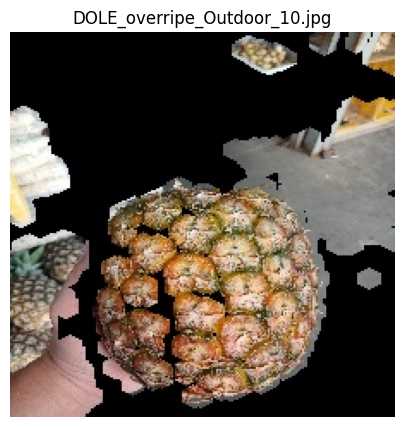

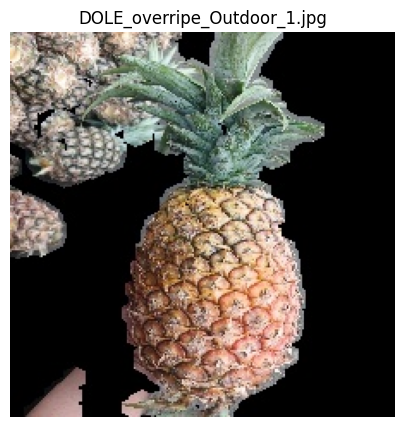

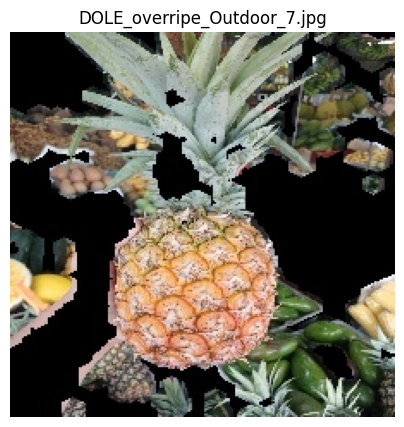

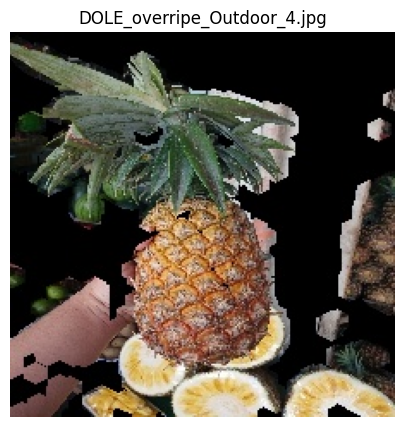

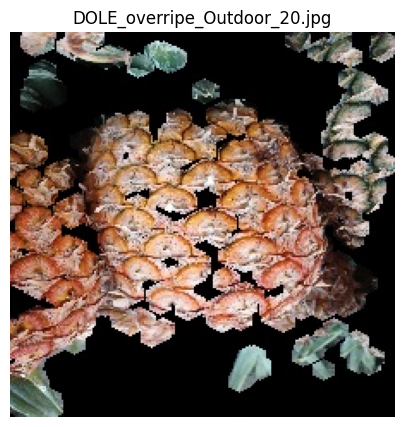

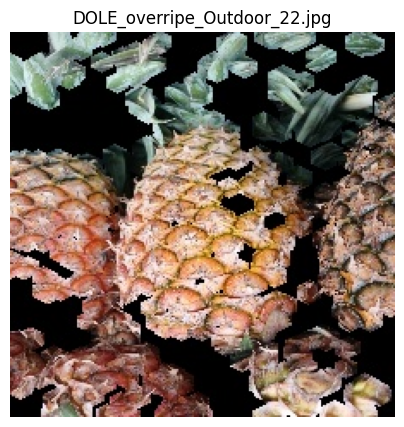

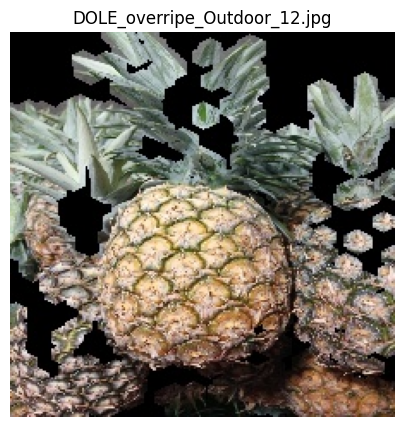

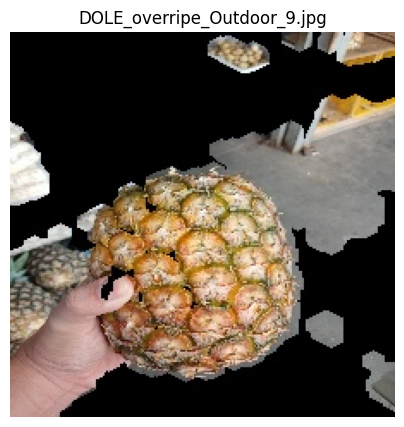

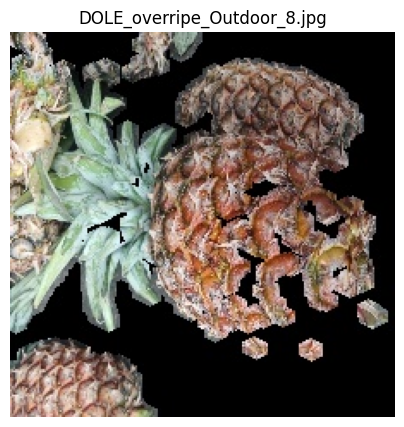

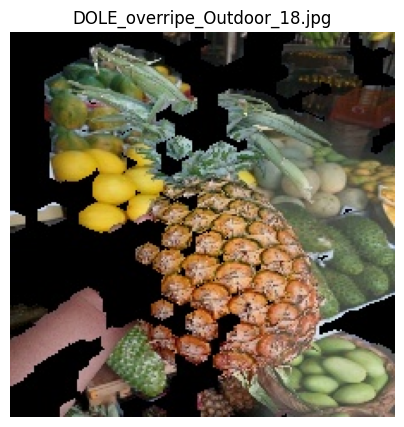

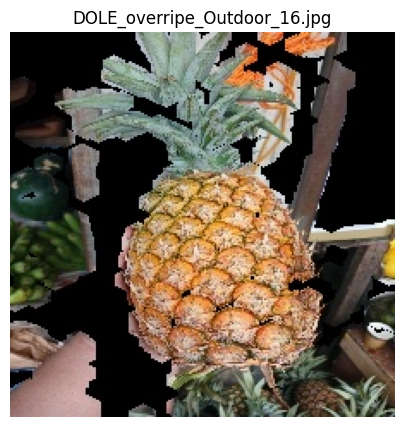

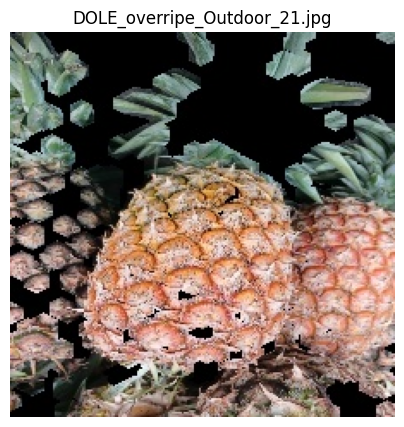

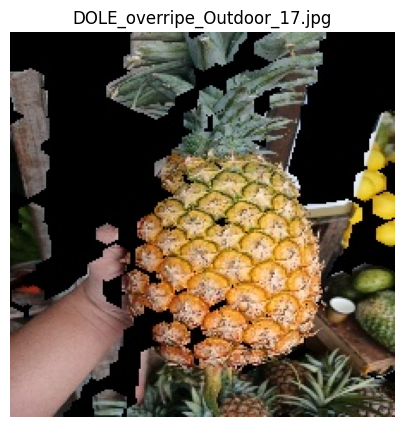

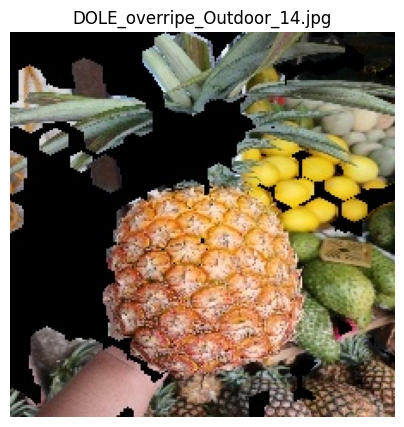

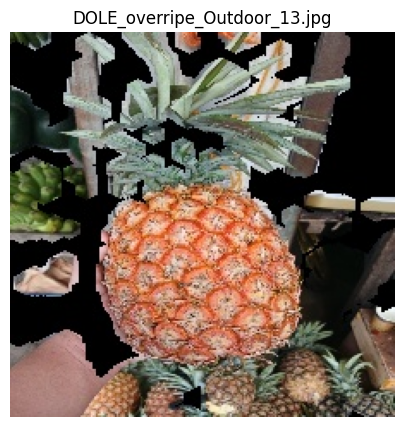

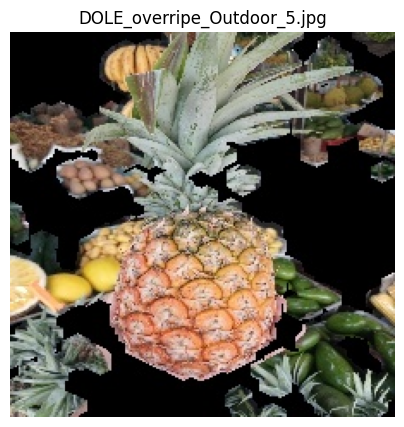

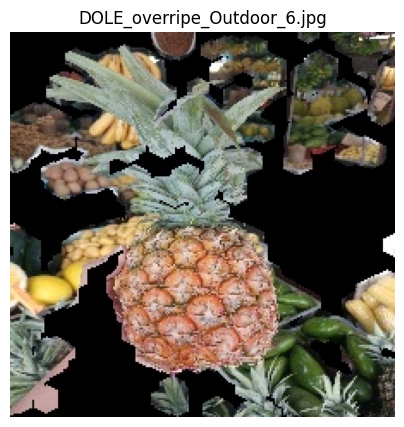

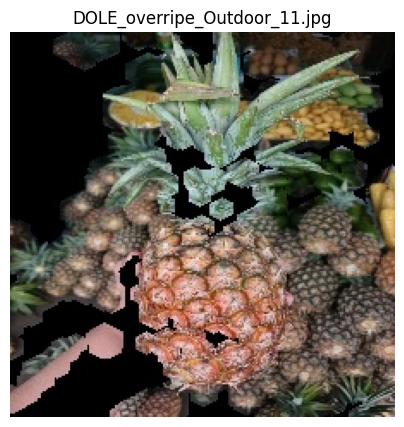

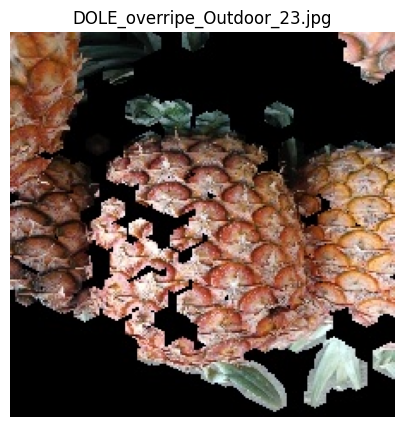

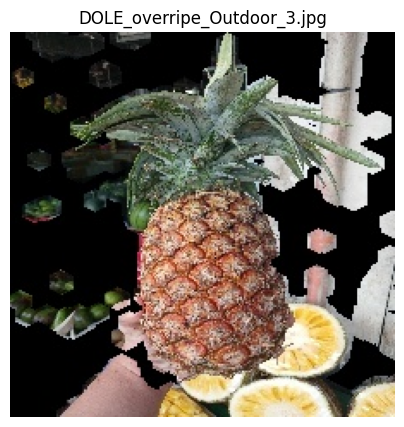

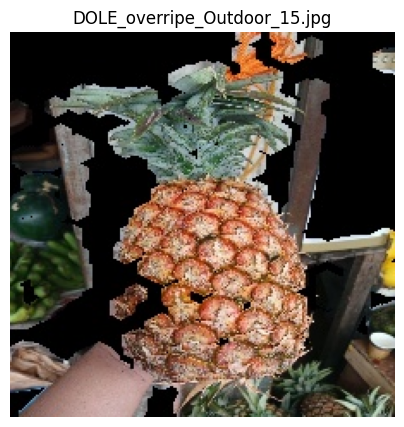

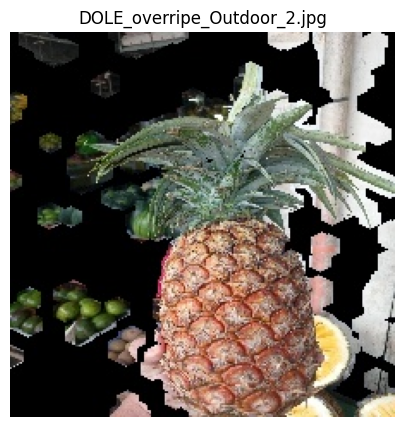

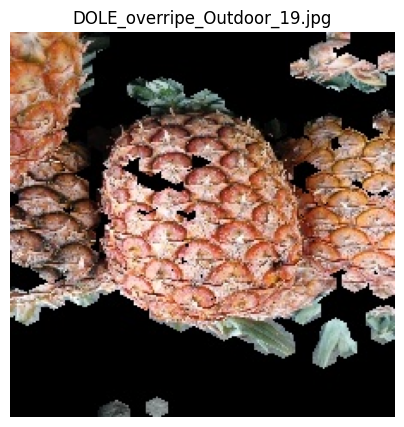

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Define folder path
folder_path = "/content/pineapple_extracted_thresholding/DOLE/DOLE_OVERRIPE"  # Change to the folder you want

# Get list of images in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith((".jpg", ".png"))]

# Display all images
for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color

    plt.figure(figsize=(5, 5))  # Set figure size
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.title(img_name)  # Show image filename
    plt.show()



Display single image

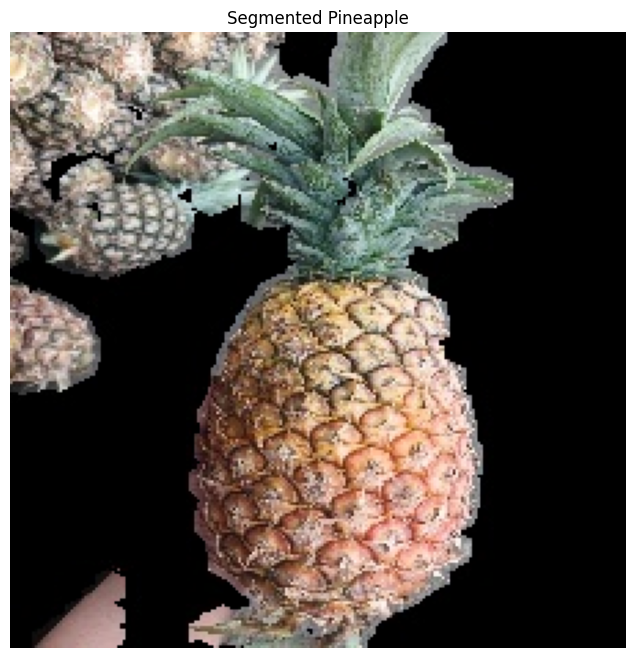

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Example: read and segment one image, then display it.
image_path = "/content/pineapple_extracted_thresholding/DOLE/DOLE_OVERRIPE/DOLE_overripe_Outdoor_1.jpg"
segmented_image = remove_background_threshold(image_path)

if segmented_image is not None:
    # Convert BGR (OpenCV default) to RGB for display
    segmented_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(segmented_rgb)
    plt.title("Segmented Pineapple")
    plt.axis("off")
    plt.show()
else:
    print("Failed to segment image.")


compare images between normalized_images and resized_images

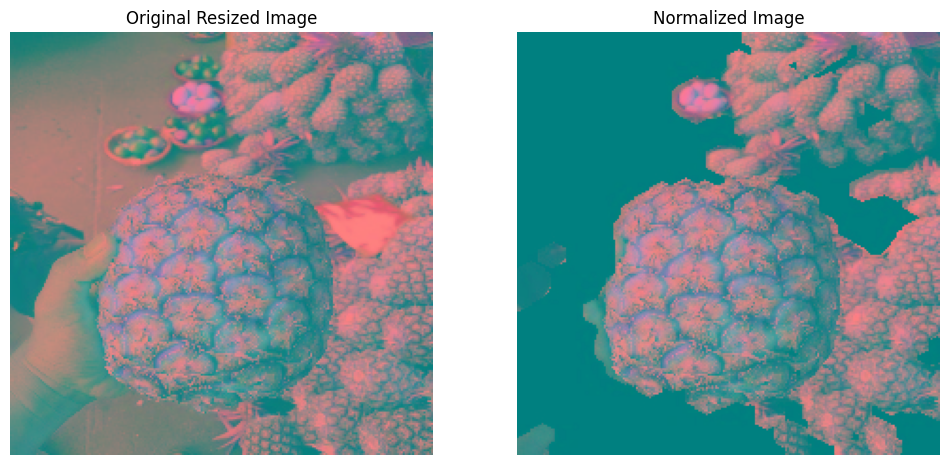

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Define folder paths and the example image filename
original_folder = "/content/resized_images/DOLE/DOLE_RIPE/"
normalized_folder = "/content/pineapple_extracted_thresholding/DOLE/DOLE_RIPE"
example_image = "DOLE_ripe_Outdoor_2.jpg"  # Replace with an actual filename

# Build full paths for the two images
original_path = os.path.join(original_folder, example_image)
normalized_path = os.path.join(normalized_folder, example_image)

# Load images using cv2
img_original = cv2.imread(original_path)
img_normalized = cv2.imread(normalized_path)

# Convert images to LAB color space
original = cv2.cvtColor(img_original, cv2.COLOR_BGR2LAB)
normalized = cv2.cvtColor(img_normalized, cv2.COLOR_BGR2LAB)

# Display images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original Resized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(normalized)
plt.title("Normalized Image")
plt.axis("off")

plt.show()


compare images in each folder

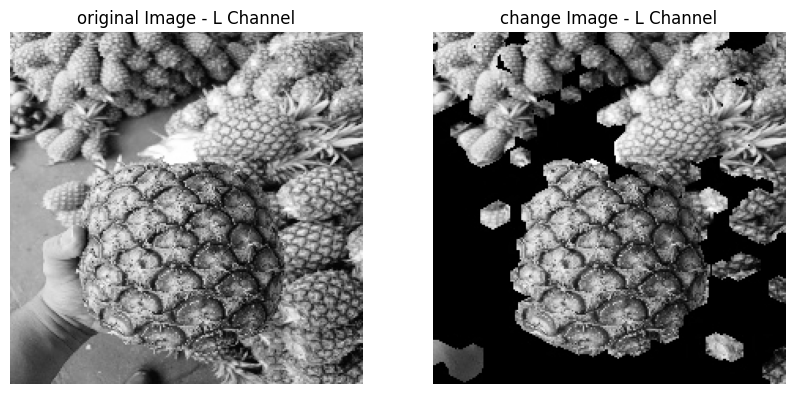

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_l_channel_side_by_side(image_path_resized, image_path_normalized):
    # Load images
    image_resized = cv2.imread(image_path_resized)
    image_normalized = cv2.imread(image_path_normalized)

    # Convert images to LAB color space
    lab_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2LAB)
    lab_normalized = cv2.cvtColor(image_normalized, cv2.COLOR_BGR2LAB)

    # Extract L channel (brightness)
    l_resized, _, _ = cv2.split(lab_resized)
    l_normalized, _, _ = cv2.split(lab_normalized)

    # Plot side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(l_resized, cmap="gray")
    axs[0].set_title("original Image - L Channel")
    axs[0].axis("off")

    axs[1].imshow(l_normalized, cmap="gray")
    axs[1].set_title("change Image - L Channel")
    axs[1].axis("off")

    plt.show()

# Example usage
show_l_channel_side_by_side(
    "/content/resized_images/DOLE/DOLE_RIPE/DOLE_ripe_Outdoor_1.jpg",
    "/content/pineapple_extracted_thresholding/DOLE/DOLE_RIPE/DOLE_ripe_Outdoor_1.jpg"
)